In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [10]:
data_dir='/Users/aryn/Downloads/CoreML/OpenCV/images'
categories=['Amit','Ankit','Aryan','Saket','Taha','Vishal','Yashraj']
# data_dir='/Users/aryn/Downloads/test_set'
# categories=['cats','dogs']

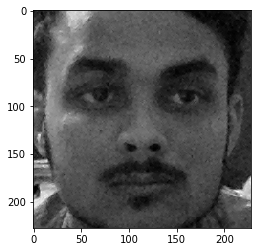

In [11]:
for i in categories:
    path=os.path.join(data_dir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

(50, 50)


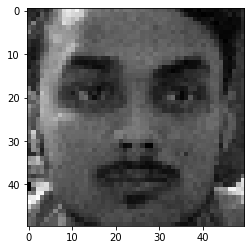

In [12]:
img_size=50
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
print(new_array.shape)
plt.show()

In [13]:
training_data = []
def training():
    for i in categories:
        path=os.path.join(data_dir,i)
        class_num=categories.index(i)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
                #print(e)
training()

In [14]:
print(len(training_data))

1289


In [15]:
import random
random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

0
0
6
6
3
1
2
1
1
4


In [9]:
X=[]
y=[]

In [10]:
for features,labels in training_data:
    X.append(features)
    y.append(labels)

In [11]:
X=np.array(X).reshape(-1,img_size,img_size,1)
y=np.array(y)

In [12]:
import pickle

pickle_out=open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

In [13]:
pickle_in = open('X.pickle','rb')
X=pickle.load(pickle_in)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [15]:
X=pickle.load(open('X.pickle','rb'))
y=pickle.load(open('y.pickle','rb'))

In [ ]:
X=X/255.0
model=Sequential()
model.add(Conv2D(28,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(28,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(28))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X,y,batch_size=32,epochs=5,validation_split=0.7)

Train on 386 samples, validate on 903 samples
Epoch 1/5


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding='same',activation=tf.nn.relu,input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3), padding='same',activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(7, activation = tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X,y,epochs=100)